Newton迭代法：设法将一个非线性方程$f(x)=0$转化为某种线性方程求解，基于 Taylor 展开。具体如下：
设$f(x)=0$的近似根为$x_k$，则函数$f(x)$在点$x_k$附近可用一阶Taylor多项式$p_1(x)$来近似，即：
$$f(x) \simeq p_1(x) = f(x_k) + f'(x_k)(x - x_k) $$
从而得到线性方程：
$$
f(x_k) + f'(x_k)(x - x_k) = 0$$
解之，得该线性方程的根$x$，是$f(x)=0$的一个新近似根，记做$x_{k+1}$，即：
$$x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}$$
这种迭代称为Newton迭代。相应地，Newton迭代函数为：
$$
\varphi(x) = x - \frac{f(x)}{f'(x)}$$
于是，我们得到Newton迭代法。

为了判断收敛性，我们将公式改写为：
$$
x_{n+1} = g(x_n), \quad \text{其中} \quad g(x) = x - \frac{f(x)}{f'(x)}$$
我们可以将牛顿法视为对函数 $g(x)$ 的迭代过程。此时，求解问题变为分析迭代函数 $g(x)$ 是否收敛。

牛顿法的收敛性条件
牛顿法的收敛性需要满足以下条件：
1. 假设 $x^*$ 是 $f(x) = 0$ 的一个根（即 $f(x^*) = 0$）。
2. 若初始点 $x_0$ 足够接近 $x^*$，并且 $g'(x^*) = 0$，则牛顿法局部收敛，且收敛速度为二次收敛。
现在，我们分析误差的演化。设误差为：
$$e_n = x_n - x^*$$
代入牛顿法公式，得到误差的递推关系：
$$
e_{n+1} = g(x_n) - x^* = g(x^* + e_n) - x^*$$
对 $g(x)$ 在 $x^*$ 处展开泰勒级数（假设 $g(x)$ 足够光滑）：
$$g(x^* + e_n) = g(x^*) + g'(x^*)e_n + \frac{g''(x^*)}{2}e_n^2 + \mathcal{O}(e_n^3)$$
由于 $g(x^*) = x^*$ 且 $g'(x^*) = 0$（这是牛顿法的关键性质），可以简化为：
$$
e_{n+1} \approx \frac{g''(x^*)}{2}e_n^2$$
这表明牛顿法的局部误差满足二次收敛性。

意义：Judge(x) 用于判断牛顿法在某点$x$的收敛性。
·如果 Judge(x)>0,牛顿法可能收敛。
·如果 Judge(x) <= 0,牛顿法可能不收敛。

In [1]:
"""
牛顿法计算sin(x)-x/3=0的正根
"""

from math import *
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

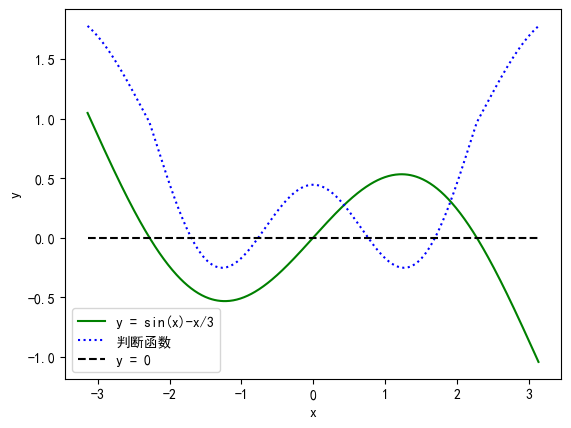

In [2]:
"""
下面判断收敛性
"""
f = lambda x: np.sin(x) - x/3  # 待求根函数
df = lambda x: np.cos(x) - 1/3  # 待求根函数的一阶导
df2 = lambda x: -np.sin(x)  # 代求根函数的二阶导
Judge = lambda x: df(x) ** 2 - abs(df2(x) / 2) * abs(f(x))
X = np.arange(-np.pi, np.pi, 0.01)
plt.figure()  # 新建图窗
plt.xlabel('x')  # 横坐标标签
plt.ylabel('y')  # 纵坐标标签
plt.plot(X, f(X), 'green', label="y = sin(x)-x/3")  # 绘制图像
plt.plot(X, Judge(X), 'blue', linestyle=":", label="判断函数")
plt.plot(X, np.zeros_like(X), 'black', linestyle="--", label="y = 0")
plt.legend()
plt.show()

可以看出y在2附近有根且收敛。

In [3]:
# 牛顿法(输入两个参数，初始猜测值与容许误差)
def Newton(x0, tolerance):
    X = [x0]  # 存放迭代过程中的所有解
    for i in range(10 ** 3):  # 括号内为最大迭代次数
        X.append(X[i] - f(X[i]) / df(X[i]))  # 迭代公式
        if abs(X[i + 1] - X[i]) <= tolerance:
            break

    return (X[i + 1], i + 1, X)  # 依次返回最终迭代结果，迭代次数，迭代过程全解


In [4]:
x0, tolerance = input("请输入初始猜值x0,误差限tolerance：").split(',')
x0, tolerance = eval(x0), eval(tolerance)
result, num, values = Newton(x0, tolerance)
print("方程的一个实根为x =", result, "迭代次数：", num)

请输入初始猜值x0,误差限tolerance：2, 0.000000000001
方程的一个实根为x = 2.2788626600758284 迭代次数： 5


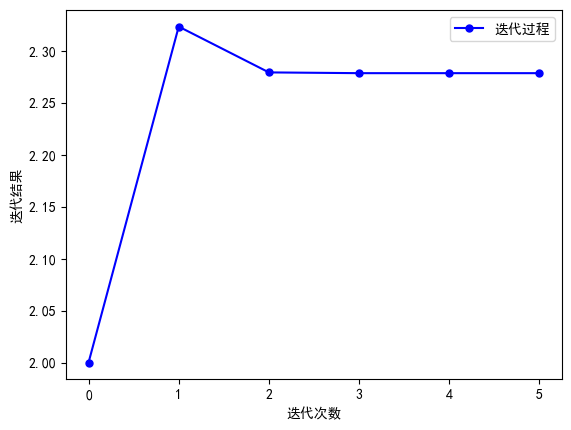

In [5]:
# 展示迭代过程
plt.figure()
plt.xlabel('迭代次数')
plt.ylabel('迭代结果')
plt.plot(np.arange(0, num + 1, 1), values, 'blue', linestyle='-', label="迭代过程"
         , marker='o', markersize=5
         )
plt.legend()
plt.show()

如果是非线性方程组，同样的方案，只需将导数替换为雅可比矩阵。假设我们要解决以下方程组：
$$\begin{align*}
f_1(x, y) &= x^2 + y^2 - 4 \\
f_2(x, y) &= x^2 - y - 1
\end{align*}$$
对应的雅可比矩阵为：
$$J = \begin{pmatrix}
\frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\
\frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y}
\end{pmatrix}=\begin{pmatrix}
2x & 2y \\
2x & -1
\end{pmatrix}$$

In [6]:
import numpy as np

#定义方程
def F(X):
    x, y = X
    return np.array([x**2+y**2-4, x**2-y-1])

#定义雅可比矩阵
def J(X):
    x, y =X
    return np.array([[2*x, 2*y],[2*x, -1]])

In [16]:
#初始化猜测值
X0 = np.array([1.0,1.0])
#容许误差
tolerance = 1e-10
#最大迭代次数
max_iterations = 100

In [17]:
x = []
y = []

for iteration in range(max_iterations):
    Jacobian = J(X0)
    delta_X = np.linalg.solve(Jacobian, -F(X0))
    X0 = X0+delta_X
    x.append(X0[0])
    y.append(X0[1])
    
    if np.linalg.norm(delta_X) < tolerance:
        print("收敛到：", X0)
        break
        
print("最终解为：", X0)

收敛到： [1.51748991 1.30277564]
最终解为： [1.51748991 1.30277564]


In [18]:
print(x)

[1.6666666666666667, 1.5242424242424242, 1.517504876521366, 1.517489913625749, 1.5174899135519797]


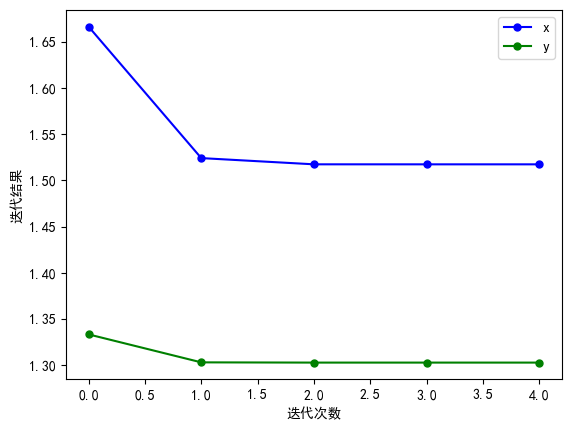

In [20]:
# 展示迭代过程
plt.figure()
plt.xlabel('迭代次数')
plt.ylabel('迭代结果')
plt.plot(x, 'blue', linestyle='-', label="x"
         , marker='o', markersize=5
         )
plt.plot(y, 'green', linestyle='-', label="y"
         , marker='o', markersize=5
         )
plt.legend()
plt.show()